<a href="https://colab.research.google.com/github/MunySafitri/Retrieval_Information/blob/main/SimilarityCosinus_Vs_EuclideanDistances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perangkingan Dokumen dengan Cosine Similarities**

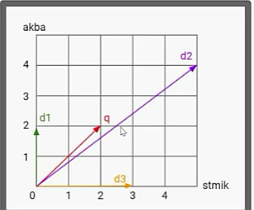

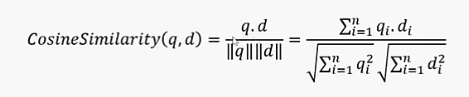

In [ ]:
#import library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import operator

In [ ]:
#Dataset
dataset ={}
dataset["d1"] = "kampus USK terbaik"
dataset["d2"] = "Kampus Usk Banda Aceh Syiah Kuala Kampus Usk Banda Aceh Syiah Kuala"
dataset["d3"] = "kota Banda Aceh Kota Serambi Mekkah"
dataset["q"] = "Kampus Usk Banda Aceh"

In [ ]:
#freakuensi kemunculan kata
# Convert a collection of text documents to a matrix of token counts.
tf = CountVectorizer()
term_doc_matrix = tf.fit_transform(dataset.values())
pd.DataFrame(term_doc_matrix.toarray(), index = dataset.keys(), columns = tf.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aceh,banda,kampus,kota,kuala,mekkah,serambi,syiah,terbaik,usk
d1,0,0,1,0,0,0,0,0,1,1
d2,2,2,2,0,2,0,0,2,0,2
d3,1,1,0,2,0,1,1,0,0,0
q,1,1,1,0,0,0,0,0,0,1


In [ ]:
print(term_doc_matrix) #koordinat dokumen (x,y)  frekuensi  dijmana x adalah d1,d2,d3 dan y adalah urutan term

  (0, 2)	1
  (0, 9)	1
  (0, 8)	1
  (1, 2)	2
  (1, 9)	2
  (1, 1)	2
  (1, 0)	2
  (1, 7)	2
  (1, 4)	2
  (2, 1)	1
  (2, 0)	1
  (2, 3)	2
  (2, 6)	1
  (2, 5)	1
  (3, 2)	1
  (3, 9)	1
  (3, 1)	1
  (3, 0)	1


In [ ]:
#Perhitungan Euclidean Distance
ed = euclidean_distances(term_doc_matrix, term_doc_matrix)
df_ed = pd.DataFrame(ed, index=dataset.keys(), columns= dataset.keys())
df_ed

,d1,d2,d3,q
d1,0.000000,4.358899,3.316625,1.732051
d2,4.358899,0.000000,4.898979,3.464102
d3,3.316625,4.898979,0.000000,2.828427
q,1.732051,3.464102,2.828427,0.000000


In [ ]:
#pengurutan Ranking Euclidean_Distance 
rank_ed ={}
for k in dataset.keys():
  if k != "q" :
    rank_ed[k] = df_ed.at[k, "q"]
    print(rank_ed[k])
top_rank_ed = dict(sorted(rank_ed.items(), key=operator.itemgetter(1)))
pd.DataFrame(top_rank_ed.values(), index =top_rank_ed.keys(), columns = ["Euclidean Distance"])

1.7320508075688772
3.4641016151377544
2.8284271247461903


,Euclidean Distance
d1,1.732051
d3,2.828427
d2,3.464102


In [ ]:
#pembobotan tf_idf
tfidf = TfidfVectorizer()
inverted_index = tfidf.fit_transform(dataset.values())
pd.DataFrame(inverted_index.toarray(), index=dataset.keys(), columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aceh,banda,kampus,kota,kuala,mekkah,serambi,syiah,terbaik,usk
d1,0.000000,0.000000,0.473804,0.000000,0.00000,0.000000,0.000000,0.00000,0.742306,0.473804
d2,0.335030,0.335030,0.335030,0.000000,0.52489,0.000000,0.000000,0.52489,0.000000,0.335030
d3,0.244506,0.244506,0.000000,0.766131,0.00000,0.383065,0.383065,0.00000,0.000000,0.000000
q,0.500000,0.500000,0.500000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.500000


In [ ]:
print(inverted_index)

  (0, 8)	0.7423062838829776
  (0, 9)	0.473804485472565
  (0, 2)	0.473804485472565
  (1, 4)	0.5248898070510398
  (1, 7)	0.5248898070510398
  (1, 0)	0.3350303646342538
  (1, 1)	0.3350303646342538
  (1, 9)	0.3350303646342538
  (1, 2)	0.3350303646342538
  (2, 5)	0.38306527323306827
  (2, 6)	0.38306527323306827
  (2, 3)	0.7661305464661365
  (2, 0)	0.24450560183485404
  (2, 1)	0.24450560183485404
  (3, 0)	0.5
  (3, 1)	0.5
  (3, 9)	0.5
  (3, 2)	0.5


In [ ]:
#Pehitungan CosineSimilarity
cs = cosine_similarity(inverted_index, inverted_index)
df_cs = pd.DataFrame(cs, index = dataset.keys(), columns =dataset.keys())
df_cs

,d1,d2,d3,q
d1,1.000000,0.317478,0.000000,0.473804
d2,0.317478,1.000000,0.163834,0.670061
d3,0.000000,0.163834,1.000000,0.244506
q,0.473804,0.670061,0.244506,1.000000


In [ ]:
#Pengurutan Ranking Cosine Similarity
rank_cs = {}
for k in dataset.keys():
  rank_cs[k] = df_cs.at[k, "q"]
  print(rank_cs[k])
top_rank_cs = dict(sorted(rank_cs.items(), key=operator.itemgetter(1), reverse =True))#diurutkan nilai yang paling tinggi(dsc)
pd.DataFrame(top_rank_cs.values(), index =top_rank_cs.keys(), columns = ["Cosine Similarity"])

0.47380448547256504
0.6700607292685077
0.24450560183485406
1.0


,Cosine Similarity
q,1.000000
d2,0.670061
d1,0.473804
d3,0.244506
